# Activation analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% load file names 

In [2]:
import os
import pandas as pd

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\Frequency"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\Frekvensdata"


In [3]:
import os

# Specify the folder path
folder_path = base_path

# Get a list of all files in the folder
file_names = os.listdir(folder_path)


In [4]:
import os
import pandas as pd

# Create a dictionary to store the loaded dataframes
dataframes = {}

# Create a list to store the dataframe names
dataframe_names = []

# Load the CSV files and store them in the dictionary
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    dataframe_name = file_name  # Remove the ".csv" extension and the first 3 characters, so only the CD numer is there
    dataframes[dataframe_name] = pd.read_csv(file_path, parse_dates=['Time'])
    dataframe_names.append(dataframe_name)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf8 in position 14: invalid start byte

In [5]:
dataframes

{'2022-03-23.csv':                           Time     Value
 0      2022-03-23 00:00:00.000  50.05250
 1      2022-03-23 00:00:00.100  50.05258
 2      2022-03-23 00:00:00.200  50.05353
 3      2022-03-23 00:00:00.300  50.05216
 4      2022-03-23 00:00:00.400  50.05318
 ...                        ...       ...
 718261 2022-03-23 23:59:59.500  50.04286
 718262 2022-03-23 23:59:59.600  50.04253
 718263 2022-03-23 23:59:59.700  50.04073
 718264 2022-03-23 23:59:59.800  50.04154
 718265 2022-03-23 23:59:59.900  50.04078
 
 [718266 rows x 2 columns],
 '2022-03-24.csv':                           Time     Value
 0      2022-03-24 00:00:00.000  50.03944
 1      2022-03-24 00:00:00.100  50.03922
 2      2022-03-24 00:00:00.200  50.03865
 3      2022-03-24 00:00:00.300  50.03873
 4      2022-03-24 00:00:00.400  50.04094
 ...                        ...       ...
 863757 2022-03-24 23:59:59.500  50.07795
 863758 2022-03-24 23:59:59.600  50.07851
 863759 2022-03-24 23:59:59.700  50.07812
 863760 20

In [6]:
type(dataframes["2022-03-23.csv"])

pandas.core.frame.DataFrame

In [7]:
dataframes["2022-03-23.csv"]["Value"]

0         50.05250
1         50.05258
2         50.05353
3         50.05216
4         50.05318
            ...   
718261    50.04286
718262    50.04253
718263    50.04073
718264    50.04154
718265    50.04078
Name: Value, Length: 718266, dtype: float64

In [139]:
df_dataframes = []

start_date = '2022-03-23'
end_date = '2023-03-22'

dates = pd.date_range(start=start_date, end=end_date)
for date in dates:
    specific_dataframe = dataframes[date.strftime('%Y-%m-%d') + ".csv"]
    df_dataframes += [item for item in specific_dataframe['Value'][::50]]

In [140]:
len(df_dataframes)

6302570

In [141]:
counter_under = 0
counter_over = 0

for i in range(0,len(df_dataframes)):
    if df_dataframes[i] <= 49.9:
        counter_under += 1
    if df_dataframes[i] >= 50.1:
        counter_over += 1

In [142]:
counter_under,counter_over

(51919, 63392)

In [143]:
counter_under/len(df_dataframes)*100 , counter_over/len(df_dataframes)*100

(0.8237750631885088, 1.0058119148220488)

In [150]:
len(df_dataframes[0:17280])

17280

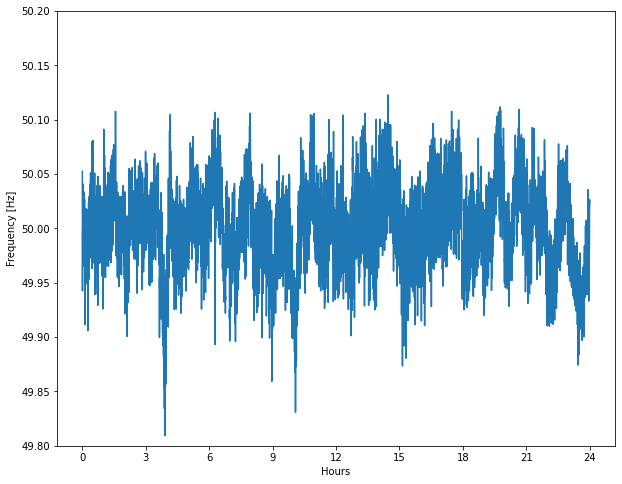

In [166]:
new_x_ticks = np.linspace(0, 24, 17280)
new_x_ticks

plt.figure(figsize=(10, 8))

plt.plot(new_x_ticks, df_dataframes[0:17280])
plt.ylim(49.8,50.2)
new_x_axis = [0,3,6,9,12,15,18,21,24]  # Replace with your desired x-axis values
plt.xticks(new_x_axis)
plt.xlabel('Hours')
plt.ylabel('Frequency [Hz]')
plt.show()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 720x576 with 0 Axes>

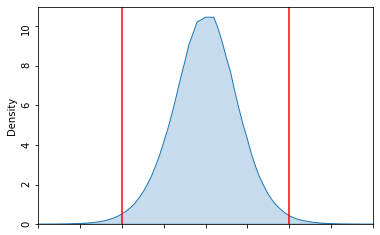

In [169]:
plt.figure(figsize=(10, 8))
fig = plt.subplots()


sns.kdeplot(df_dataframes, fill=True)
plt.axvline(x=49.9, color='red', linestyle='-')
plt.axvline(x=50.1, color='red', linestyle='-')
plt.xlim(49.8, 50.2)
plt.xticks(rotation=90)
plt.gca().invert_xaxis() # inverts the plot
plt.gca().set_xticklabels([])

#ax = plt.gca()
#ax.yaxis.tick_right()
plt.yticks(rotation=90)
#ax.set_ylabel('density', labelpad=-365)



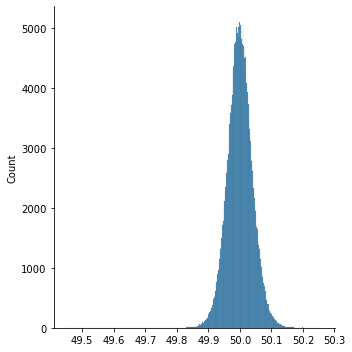

In [57]:
sns.displot(df_dataframes);